
# Projet 6 : Détection de faux billets



Dans ce projet, nous allons détecter l'authenticité de billets de banque. Le format est donné pour l'énoncer du projet. Ce dernier est réalisé dans le cadre de mes études de data analyse.

Nous avons divisé le projet en différentes missions :

* Le Nettoyage : nous vérifions les données qui nous sont fournies. [Voir](##-Nettoyage)
* La mission 0 : nous faisons une rapide études univarié et bivarié des données pour en avoir une bonne connaissance. [Voir](##-Mission-0-:-Analyse-Uni/Bivariée)
* La mission 1 : l'analyse en composante principale.  [Voir](##-Mission-1-:-ACP)
* La mission 2 : la classification par l'algorithme des k-means. [Voir](##-Mission-2-:-Classification,-K-means)
* La mission 3 : la régression logistique et le modèle de vérification. [Voir](##-Mission-3-:-Régression-logistique)
* Le test de notre modèle. [Voir](##-Test-du-modèle)


In [1]:
#Collection de fonctions personnal pour le projet
import functions as f

# Import des librairies
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as st
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

import sklearn as sk
from sklearn.cluster import KMeans
from sklearn import decomposition, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import statsmodels.api as sm
import statsmodels.formula.api as smf

#Chemin du dossier pour les images de graph
dossierImg = "./image_Graph/"


In [2]:

df = pd.read_csv("Data/setBillets.csv")
df.head()


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [3]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB



## Nettoyage

On vérifie ici qu'une erreur ne se soit pas glissé dans les données fournies.


In [4]:

for col in df.columns[1:]:
    
    df[col] = [ np.nan if i <= 0 else i for i in df[col] ]

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


In [5]:

df.max()


is_genuine        1.00
diagonal        173.01
height_left     104.86
height_right    104.95
margin_low        6.28
margin_up         3.68
length          113.98
dtype: float64

In [6]:

df.min()


is_genuine        0.00
diagonal        171.04
height_left     103.23
height_right    103.14
margin_low        3.54
margin_up         2.27
length          109.97
dtype: float64

In [7]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55



Nous avons donc la confirmation qu'il n'y a aucune valeur manquante, ou aberrante.



Sélection des données à utilisé.


In [8]:

df_chiffre = pd.DataFrame(df.drop('is_genuine',axis=1))
df_chiffreWithGenuine = pd.DataFrame(df)
df_chiffreWithGenuine.is_genuine = [1 if i == True else 0 for i in df_chiffreWithGenuine.is_genuine]


In [9]:

df_chiffre.head()


,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.67,103.74,103.70,4.01,2.87,113.29
2,171.83,103.76,103.76,4.40,2.88,113.84
3,171.80,103.78,103.65,3.73,3.12,113.63
4,172.05,103.70,103.75,5.04,2.27,113.55


## Mission 0 : Analyse Uni/Bivariée

Nous utiliserons le dataframe que nous avons construit plus haut. Et ainsi mieux comprendre les données que nous avons.

### Univarié

In [10]:

diag = df_chiffre.diagonal
heiL = df_chiffre.height_left 
heiR = df_chiffre.height_right
marL = df_chiffre.margin_low
marU = df_chiffre.margin_up
leng = df_chiffre.length


In [11]:

for i in [diag, heiL, heiR, marL, marU, leng]:
    print(i.name)
    print(f.info_liste(i))
    print("\n")
    

diagonal
{'Moyenne': 171.94058823529414, 'Median': 171.945, 'Mode': 172.1, 'Variance': 0.09349432648799193, 'Ecart-type': 0.3057684197035265}


height_left
{'Moyenne': 104.0663529411764, 'Median': 104.055, 'Mode': 104.17, 'Variance': 0.08891443090845812, 'Ecart-type': 0.29818522919228935}


height_right
{'Moyenne': 103.92811764705884, 'Median': 103.95, 'Mode': 103.76, 'Variance': 0.10954791507135395, 'Ecart-type': 0.33098023365656437}


margin_low
{'Moyenne': 4.612117647058824, 'Median': 4.45, 'Mode': 3.97, 'Variance': 0.49294815175774465, 'Ecart-type': 0.7021026646849766}


margin_up
{'Moyenne': 3.170411764705883, 'Median': 3.17, 'Mode': 3.07, 'Variance': 0.055866693351897, 'Ecart-type': 0.23636136179988682}


length
{'Moyenne': 112.57041176470587, 'Median': 112.845, 'Mode': 113.38, 'Variance': 0.8546039714584058, 'Ecart-type': 0.9244479279323449}




In [12]:

#Les vrais et faux billets
df.is_genuine.value_counts()


True     100
False     70
Name: is_genuine, dtype: int64

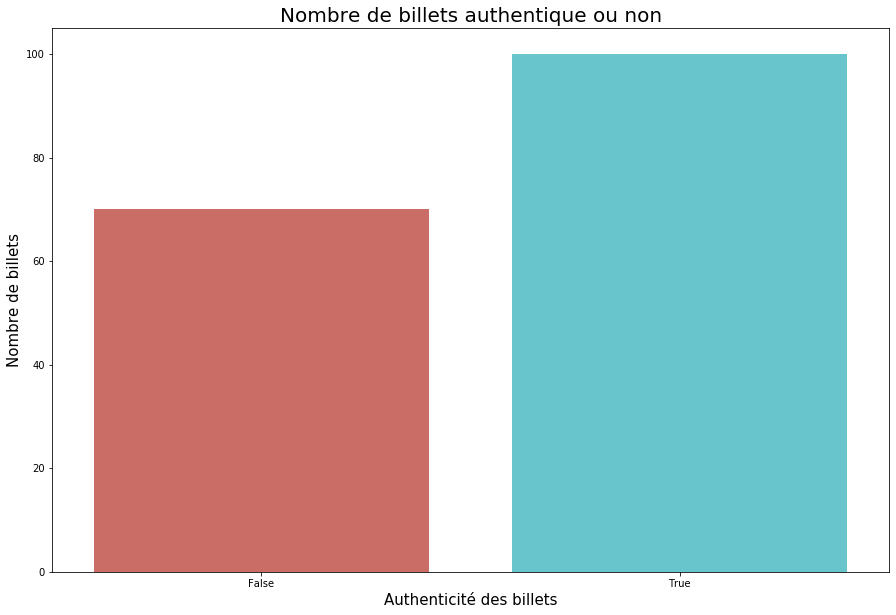

In [13]:

plt.figure(figsize=(15,10))
sns.countplot(x='is_genuine', data=df, palette='hls')
plt.xlabel('Authenticité des billets',fontsize=15)
plt.ylabel("Nombre de billets",fontsize=15)
plt.title("Nombre de billets authentique ou non",fontsize=20)
plt.savefig(dossierImg + "graph1.png")

plt.show()


In [14]:

count_false = len(df[df['is_genuine']==False])
count_True = len(df[df['is_genuine']==True])

pct_of_False = count_false/(count_false+count_True)
print("Pourcentage de billets faux :", pct_of_False * 100)

pct_of_True = count_True/(count_false+count_True)
print("Pourcentage de billets vrai :", pct_of_True * 100)


Pourcentage de billets faux : 41.17647058823529
Pourcentage de billets vrai : 58.82352941176471


--------------------------------------------------------

### Bivariée

Nous allons regarder ici les differentes corrélations qu'il pourrait y avoire entre les variables

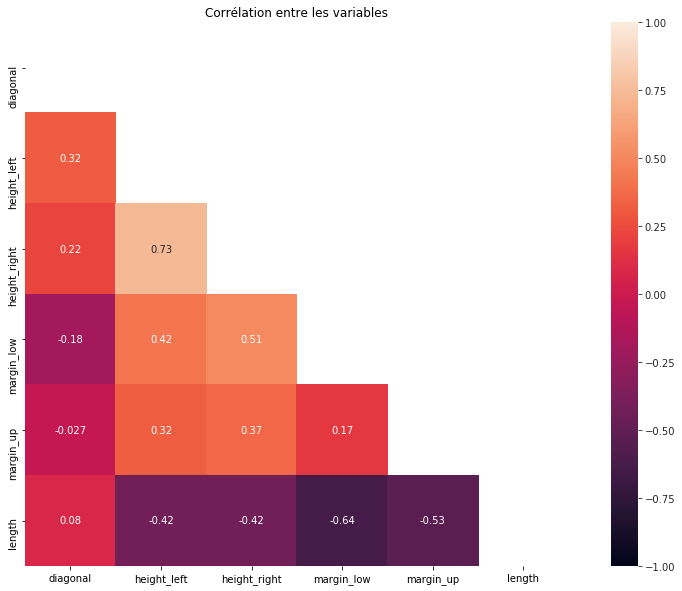

In [15]:

plt.figure(figsize=(15,10))
plt.title("Corrélation entre les variables")

corr = df_chiffre.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1,vmax=1, square=True,annot=True)

plt.savefig(dossierImg + "graph2.png")
    
plt.show()



On peut noter une corrélation importante entre _height\_right_ et _height\_left_


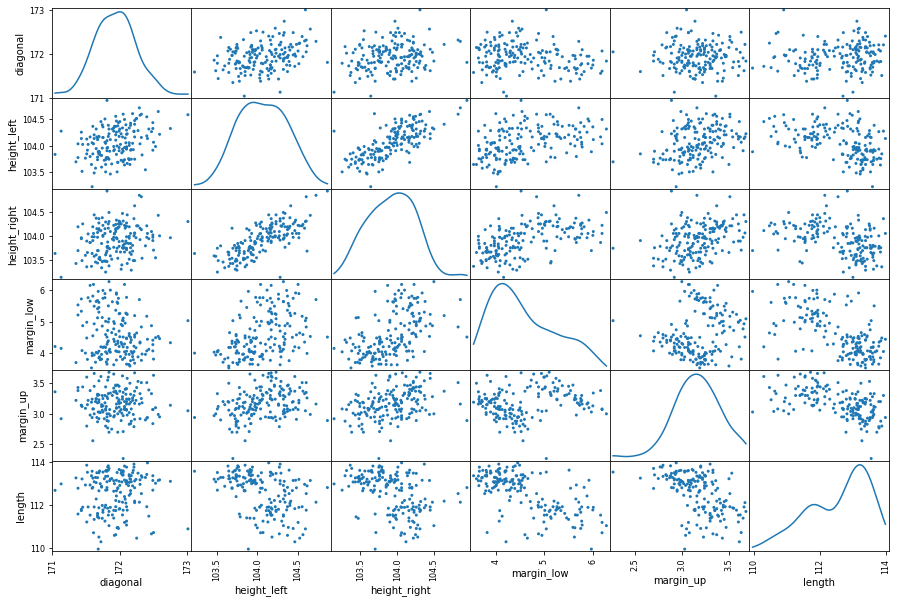

In [16]:

pd.plotting.scatter_matrix(df_chiffre, alpha=1, figsize=(15,10), diagonal='kde')
plt.savefig(dossierImg + "graph3.png")

plt.show()



La projection des individus souligne la même observation, on voit clairement le lien qu'il peut y avoir entre les deux variable.


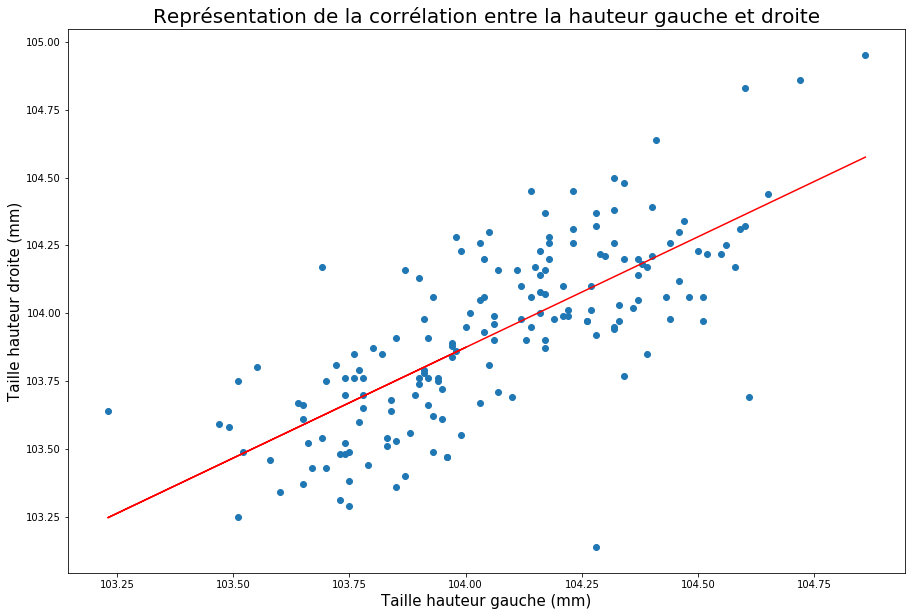

In [17]:

X = df_chiffre.height_left
Y = df_chiffre.height_right

fitLine = f.predict(X, X, Y)

plt.figure(figsize=(15,10))
axes = plt.axes()
axes.grid() 
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.xlabel('Taille hauteur gauche (mm)',fontsize=15)
plt.ylabel("Taille hauteur droite (mm)",fontsize=15)
plt.title("Représentation de la corrélation entre la hauteur gauche et droite",fontsize=20)
plt.grid(False)
plt.savefig(dossierImg + "graph4.png")

plt.show()



## Mission 1 : ACP

### Éboulis des valeurs propres

Nous allons dans un premier temps faire un éboulis des valeurs propre, pour voir combien d'axes étudier.


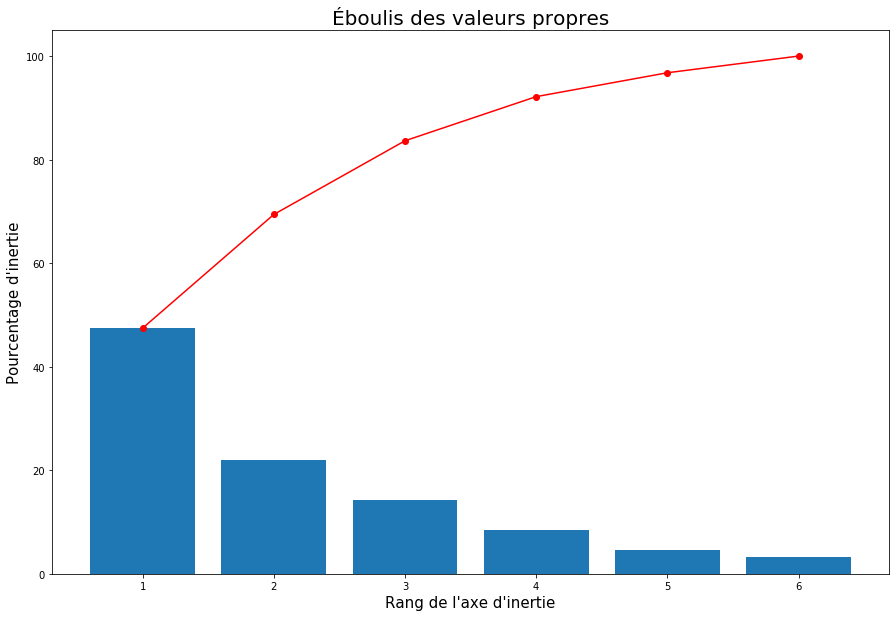

In [18]:

# sélection des colonnes à prendre en compte dans l'ACP
data_acp = df_chiffre

#Nombre de composantes à calculer
n_comp = 6


# Récupération des données pour l'ACP
X = data_acp.values

# Réduction Centrage
std_scale = sk.preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
# X_scaled = X


# Calcul des composantes principales
pca = sk.decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)


# Eboulis des valeurs propres
plt.figure(figsize=(15,10))

scree = pca.explained_variance_ratio_*100

plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')

plt.xlabel("Rang de l'axe d'inertie", fontsize=15)
plt.ylabel("Pourcentage d'inertie", fontsize=15)
plt.title("Éboulis des valeurs propres",fontsize=20)
plt.savefig(dossierImg + "graph5.png")

plt.show()



On peut voir sur l'éboulis que le premier plan représente plus de 60 % de l'inertie.
De plus en considérant le critère de **Kaiser** on peut négliger les axes qui représente moins de _(100/p)%_ d'inertie avec ici p à 6, soit 16.66 %


In [19]:

scree = pd.DataFrame(scree.round(3), index=('Axe 1','Axe 2','Axe 3','Axe 4','Axe 5','Axe 6'))
scree.columns = ['Inertie %']
scree


,Inertie %
Axe 1,47.448
Axe 2,21.957
Axe 3,14.235
Axe 4,8.526
Axe 5,4.613
Axe 6,3.221



On va donc travailler sur deux axes pour notre plan.

### Cercle de corrélation

Projetons le cercle de corrélation des variables.


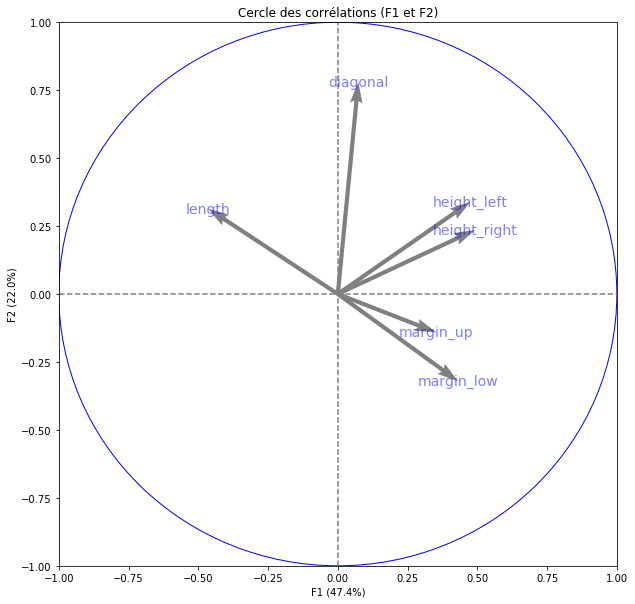

In [20]:

#les intitulés
names = data_acp.index 
features = data_acp.columns

pca = sk.decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)
pcs = pca.components_

f.display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))


In [21]:

df_contribution = pd.DataFrame(pcs,index=['f1','f2','f3','f4', 'f5', 'f6'],
                      columns=["diagonal","heigh right","heigh left","margin low","margin up","lengh"])
df_contribution.round(3)


,diagonal,heigh right,heigh left,margin low,margin up,lengh
f1,0.073,0.476,0.492,0.431,0.353,-0.465
f2,0.780,0.339,0.236,-0.321,-0.141,0.315
f3,-0.089,0.123,0.154,0.513,-0.821,0.127
f4,-0.560,0.278,0.459,-0.227,0.135,0.574
f5,-0.225,0.716,-0.487,-0.312,-0.194,-0.254
f6,0.122,0.232,-0.481,0.548,0.354,0.524


### Projection des individus

Projection des billets sur nos axes principaux

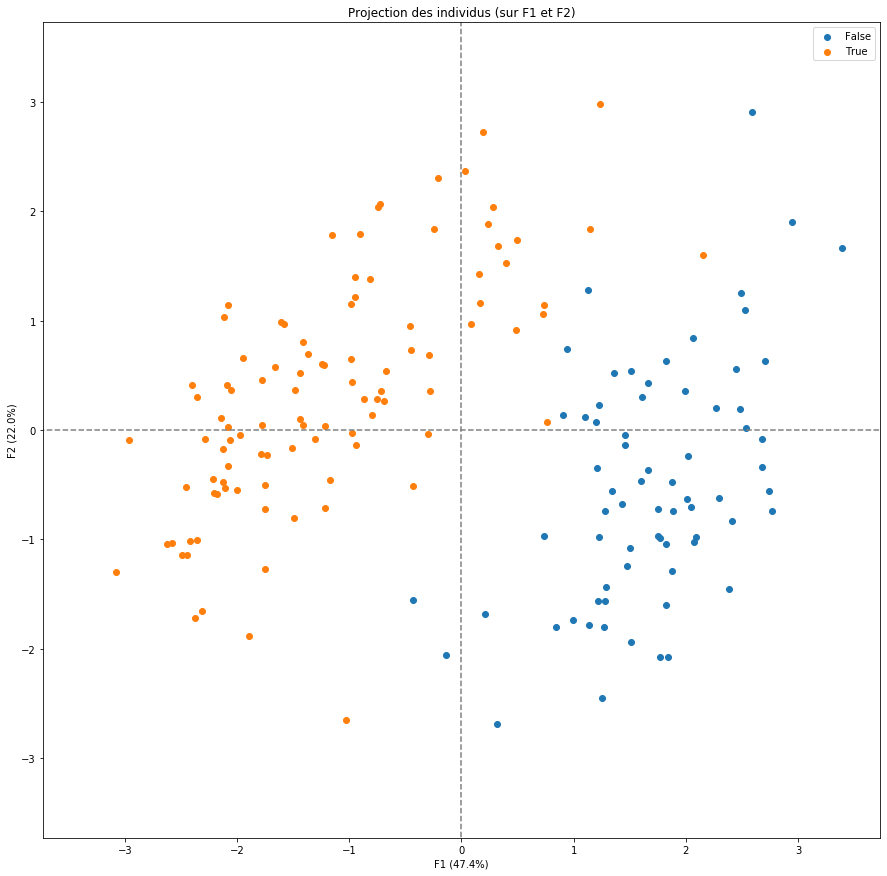

In [22]:

# Projection des individus

X_projected = pca.transform(X_scaled)

f.display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=df['is_genuine'])



Nous avons ici ajouté de la couleur, orange le billet est authentique et bleu non.

Comme on peut le voir sur cette projection, les billets vrais ont une tendance à être à gauche de notre plan factoriel.



## Mission 2 : Classification, K-means

Nous allons par la suite classifier nos données. Nous avons remarque plus haut une disposition spécifique des billets sur le plan, nous allons voir si nous pouvons le retrouver avec la méthode des k-means. (Nous prenons les données sans l'authenticité du billet)


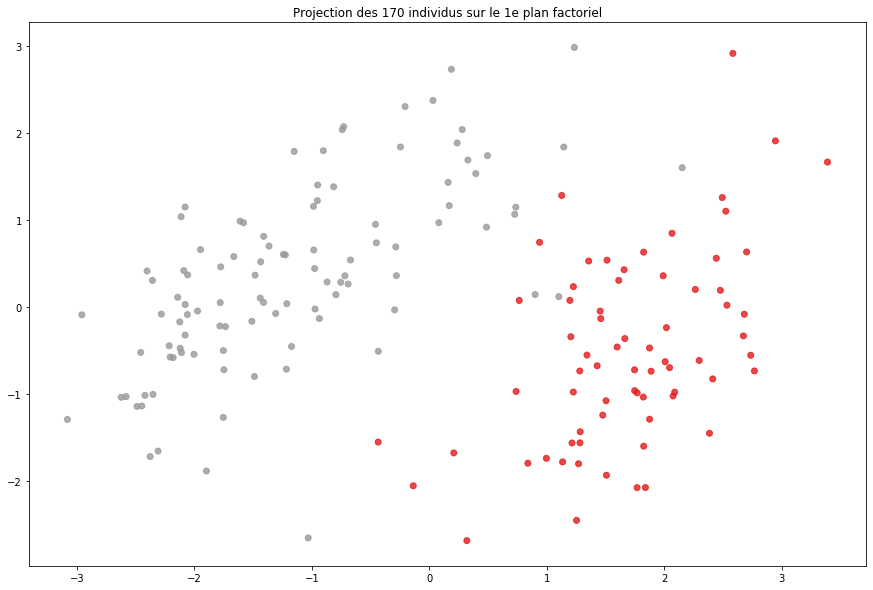

In [23]:

#Nombre de clusters souhaité
n_clust = 2

km = KMeans(n_clusters=n_clust, random_state=3)
km.fit(X)
clusters = km.labels_

df_clusters = pd.DataFrame(clusters)
df_chiffreWithGenuine['cluster'] = df_clusters

plt.figure(figsize=(15,10))

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float),cmap='Set1', alpha=.8)

plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.savefig(dossierImg + "graph6.png")

plt.show()



La classification ressemble fortement à ce que nous avons au-dessus. Vérifions maintenant la qualité de notre classification.


In [24]:

y_true = df_chiffreWithGenuine.is_genuine
y_pred = df_chiffreWithGenuine.cluster

confMatrix = sk.metrics.confusion_matrix(y_true, y_pred)

df_confMatrix = pd.DataFrame(confMatrix)
df_confMatrix.columns = ['Vrai Billets', 'Faux Billets']
df_confMatrix.index = ['Vrai Billets (prediction)', 'Faux Billets (prediction)']


In [25]:

df_confMatrix


,Vrai Billets,Faux Billets
Vrai Billets (prediction),68,2
Faux Billets (prediction),1,99



On a quelque Vrai négatif, et quelque faux négatif mais le taux d'érreur est assez faible. Notre classification semble bonne.



## Mission 3 : Régression logistique

Dans cette partie, nous allons nous concentrer sur la partie dans laquelle le programme fera le choix de l'authenticité du billet. Nous allons utiliser une régression logistique au vu de la classification.


In [26]:

reg_log2 = smf.glm('is_genuine~diagonal+height_left+height_right+margin_low+margin_up+length',
                   data=df_chiffreWithGenuine).fit()
print(reg_log2.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                            GLM   Df Residuals:                      163
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                        0.029188
Method:                          IRLS   Log-Likelihood:                 62.745
Date:                Wed, 03 Jun 2020   Deviance:                       4.7576
Time:                        22:41:21   Pearson chi2:                     4.76
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -14.0754      8.459     -1.664   

In [27]:

cols = ['diagonal','height_left','height_right','margin_low','margin_up','length']

df_test = pd.read_csv("Data/setTest.csv")

X = df_chiffreWithGenuine[cols]
y = df_chiffreWithGenuine.is_genuine


X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3,random_state=3)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:

y_pred = logreg.predict(X_test)
print('Précision du classifieur de régression logistique sur le groupe de test: {:.3f} %'
      .format(logreg.score(X_test, y_test)*100))

confusion_matrix = sk.metrics.confusion_matrix(y_test, y_pred)


# print(classification_report(y_test, y_pred))

print(confusion_matrix)


Précision du classifieur de régression logistique sur le groupe de test: 98.039 %
[[15  1]
 [ 0 35]]


## Test du modèle

Partie de test de l'echantillons d'évaluations

In [29]:

#Fichier cvs test à changer ici

fichier_test = "Data/setTest.csv"

df_test = pd.read_csv(fichier_test)
x_test_passage = df_test[cols]

y_pred_test = logreg.predict(x_test_passage)
# print('Précision du classifieur de régression logistique sur le groupe de test: {:.3f} %'
#       .format(logreg.score(x_test_passage, y_pred_test)*100))

df_prediction_t = df_test.copy()
df_prediction_t.index = df_prediction_t.id
df_prediction_t = df_prediction_t.drop(columns='id')
df_prediction_t['is_genuine_pred'] = y_pred_test
df_prediction_t.is_genuine_pred = ['True' if i == 1 else 'False' for i in df_prediction_t.is_genuine_pred]
df_prediction_t = df_prediction_t.reindex(columns = ['is_genuine_pred','diagonal','height_left','height_right','margin_low','margin_up','length'])
df_prediction_t


,is_genuine_pred,diagonal,height_left,height_right,margin_low,margin_up,length
id,,,,,,,
A_1,False,171.76,104.01,103.54,5.21,3.30,111.42
A_2,False,171.87,104.17,104.13,6.00,3.31,112.09
A_3,False,172.00,104.58,104.29,4.99,3.39,111.57
A_4,True,172.49,104.55,104.34,4.44,3.03,113.20
A_5,True,171.65,103.63,103.56,3.77,3.16,113.33
